# 1. Filtering

## 1.1 Denoising

### 1. Gaussian Filter

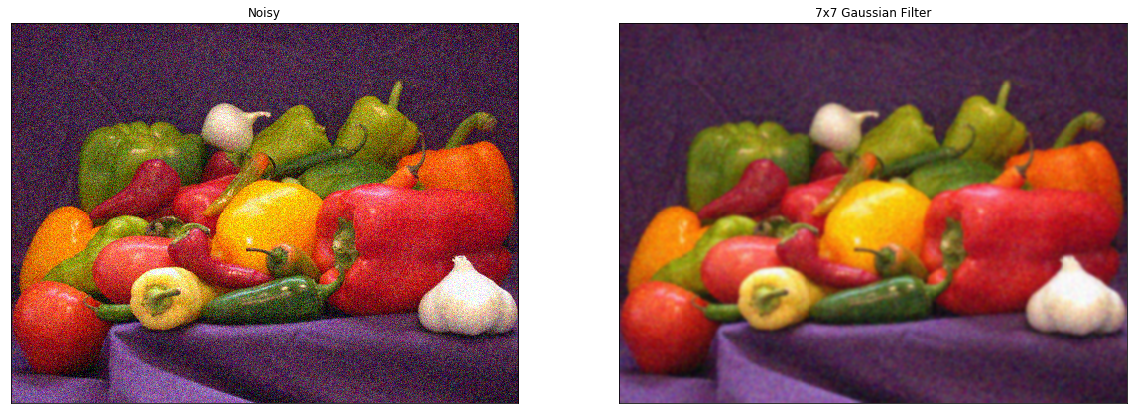

In [14]:
# Useful imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load the noisy pepper image
noisy_path_p = "./gaussian_noise_peppers.png"
noisy_p = cv2.imread(noisy_path_p)
noisy_p = cv2.cvtColor(noisy_p, cv2.COLOR_RGB2BGR)

# Blurs the image using a Gaussian filter
gaussian_p = cv2.GaussianBlur(noisy_p, (7,7), 2**(1/2), 2**(1/2))

# Plots both the original and blurred image
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(noisy_p)
plt.title("Noisy"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaussian_p)
plt.title("7x7 Gaussian Filter"), plt.xticks([]), plt.yticks([])
plt.show()

### 2. Box Filter

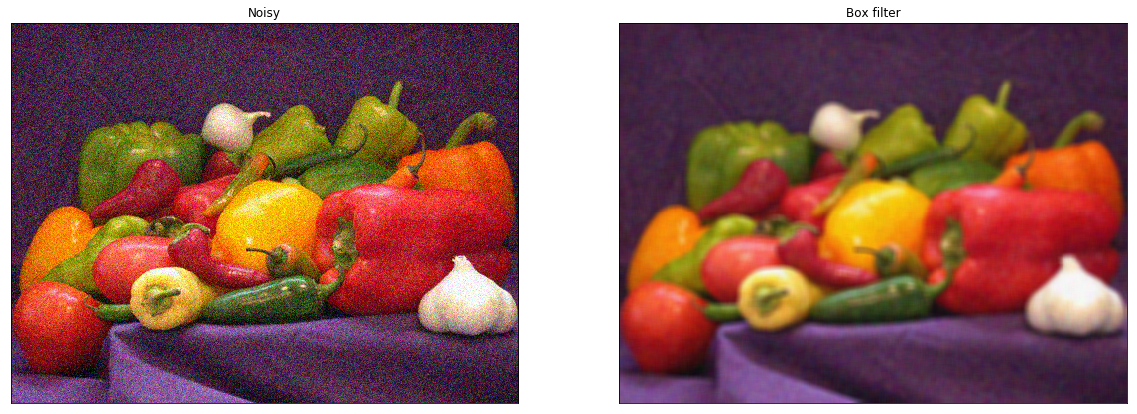

In [15]:
# Make the kernel (size 7x7)
kernel = np.ones((7,7), np.float32)/(7*7)

# Blurs the image using a box filter 
box_p = cv2.filter2D(noisy_p, -1, kernel)

# Plots the 
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(noisy_p)
plt.title("Noisy"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(box_p)
plt.title("Box filter"), plt.xticks([]), plt.yticks([])
plt.show()

### 3. Compare PSNR

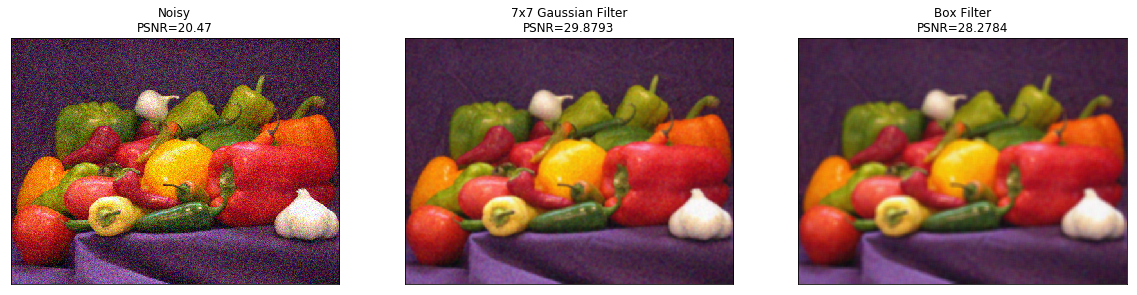

In [20]:
# Importing skimage
from skimage.measure import compare_psnr

# Load Clean Image
clean_path_p = "./peppers.png"
clean_p = cv2.imread(clean_path_p)
clean_p = cv2.cvtColor(clean_p, cv2.COLOR_RGB2BGR)

# Calculates all of the PSNR values for all of the filters and noisy image
psnr_noisy = compare_psnr(clean_p, noisy_p)
psnr_gaussian = compare_psnr(clean_p, gaussian_p)
psnr_box = compare_psnr(clean_p, box_p)

# Displays the PSNR values of the noise image and two filtered images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(noisy_p)
plt.title("Noisy\nPSNR={:0.6g}".format(psnr_noisy)), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(gaussian_p)
plt.title("7x7 Gaussian Filter\nPSNR={:0.6g}".format(psnr_gaussian)), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(box_p)
plt.title("Box Filter\nPSNR={:0.6g}".format(psnr_box)), plt.xticks([]), plt.yticks([])
plt.show()

#### Conclusion:  The best Gaussian Filter offers the best result with a PSNR value of 29.8793

### 4. Gaussian Filter With Corrupted Image

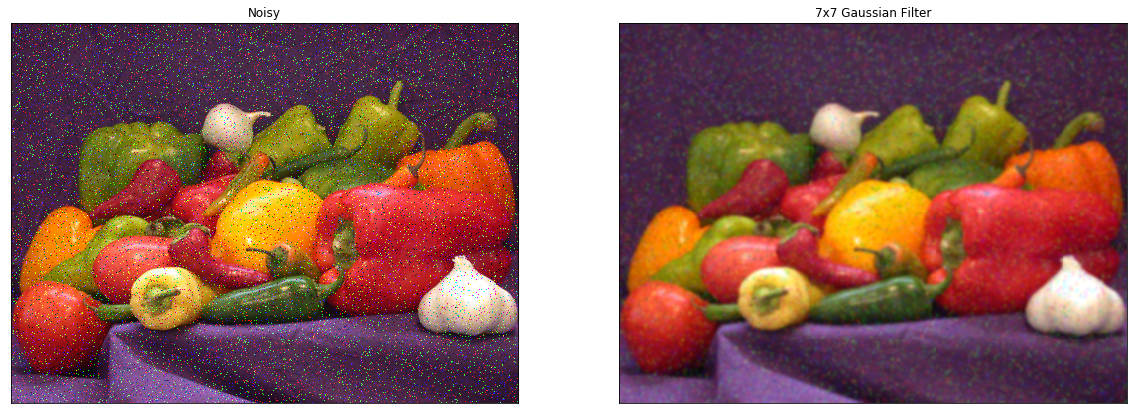

In [17]:
# Load the corrupted image
noisy_path_sp = "./saltandpepper_noise_peppers.png"
noisy_sp = cv2.imread(noisy_path_sp)
noisy_sp = cv2.cvtColor(noisy_sp, cv2.COLOR_RGB2BGR)

# Blur the image using a Gaussian filter 
gaussian_sp = cv2.GaussianBlur(noisy_sp, (7,7), 2**(1/2), 2**(1/2))

# Plots the original and the blurred image
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(noisy_sp)
plt.title("Noisy"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaussian_sp)
plt.title("7x7 Gaussian Filter"), plt.xticks([]), plt.yticks([])
plt.show()

### 5. Median Filter with Corrupted Picture

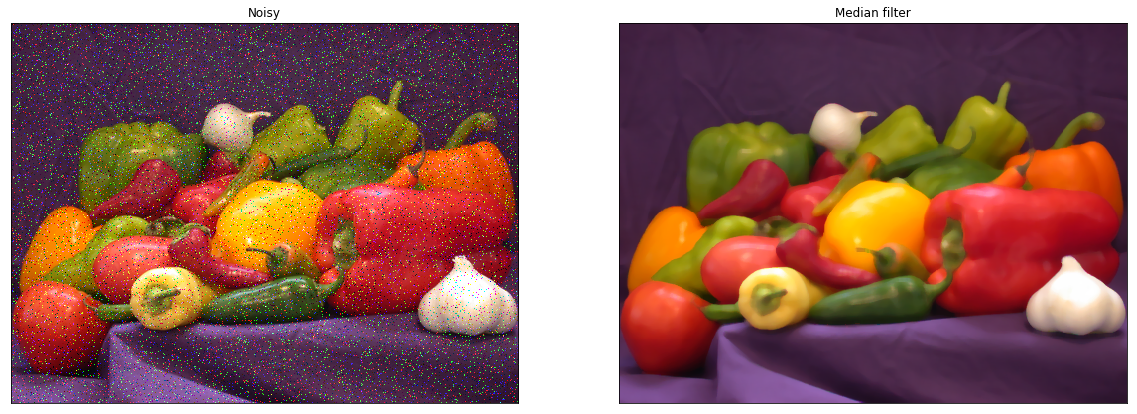

In [18]:
# Blurs the image using a median filter 
median_sp = cv2.medianBlur(noisy_sp, 7)

# Plots the noisy image and the blurred image
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(noisy_sp)
plt.title("Noisy"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(median_sp)
plt.title("Median filter"), plt.xticks([]), plt.yticks([])
plt.show()

### 6. Compare PSRN values of Corrupted Image

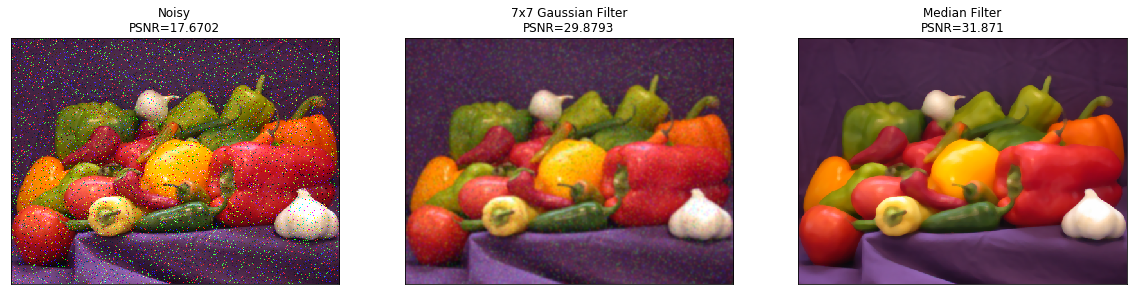

In [19]:
# Calculates all of the PSNR values for the noisy image 
# and the two filtered image
psnr_noisy = compare_psnr(clean_p, noisy_sp)
psnr_median = compare_psnr(clean_p, gaussian_sp)
psnr_box = compare_psnr(clean_p, median_sp)

# Plots the PSNR values of noisy image and the filtered ones 
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(noisy_sp)
plt.title("Noisy\nPSNR={:0.6g}".format(psnr_noisy)), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(gaussian_sp)
plt.title("7x7 Gaussian Filter\nPSNR={:0.6g}".format(psnr_gaussian)), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(median_sp)
plt.title("Median Filter\nPSNR={:0.6g}".format(psnr_box)), plt.xticks([]), plt.yticks([])
plt.show()

#### Conclusion: The Median Filter offers the best result with a PSNR value of 31.871